In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# データの読み込み

In [2]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv("../data/raw/test.csv")
print(train_df.shape)
print(test_df.shape)

(11900, 13)
(5100, 12)


In [3]:
all_df = pd.concat([train_df, test_df])
all_df

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States,0.0
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0.0
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0.0
3,3394,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,United-States,0.0
4,15993,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,6726,19,Private,132652,Some-college,10,Never-married,Exec-managerial,Unmarried,White,Female,United-States,NaN
5096,1501,23,Private,132652,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,United-States,NaN
5097,6391,36,Private,132652,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,NaN
5098,7104,33,Private,132652,Prof-school,11,Never-married,Prof-specialty,Not-in-family,White,Male,United-States,NaN


# EDA

0	index	int	インデックスとして使用

1	age	int	年齢

2	workclass	varchar	職業クラス

3	fnlwgt	int	fnlwgt

4	education	varchar	教育

5	education-num	int	教育年数

6	marital-status	varchar	配偶者の有無

7	occupation	varchar	職業

8	relationship	varchar	関係

9	race	varchar	人種

10	sex	varchar	性別

11	native-country	varchar	母国

12	Y	varchar	年収カテゴリ（>50K, <=50K）

In [4]:
# 型
all_df.dtypes

index               int64
age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
native-country     object
Y                 float64
dtype: object

In [5]:
# 統計量
all_df.describe()

,index,age,fnlwgt,education-num,Y
count,17000.000000,17000.000000,17000.000000,17000.000000,11900.000000
mean,8499.500000,27.942529,130818.123176,10.391824,0.256134
std,4907.621624,9.504758,13811.388554,2.220970,0.436515
min,0.000000,17.000000,24694.000000,3.000000,0.000000
25%,4249.750000,21.000000,132652.000000,9.000000,0.000000
50%,8499.500000,24.000000,132652.000000,10.000000,0.000000
75%,12749.250000,34.000000,132652.000000,13.000000,1.000000
max,16999.000000,64.000000,132652.000000,16.000000,1.000000


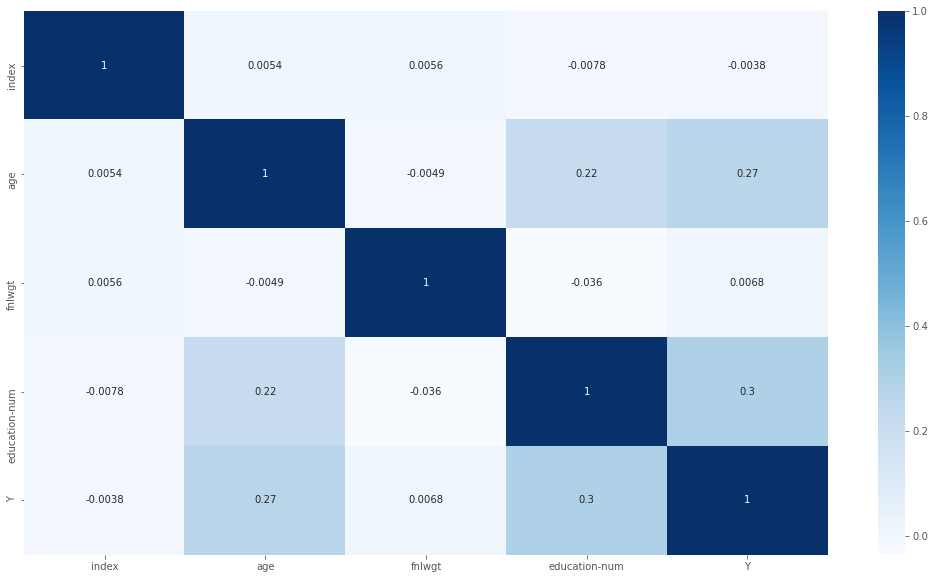

In [6]:
# 相関係数
plt.figure(figsize=(18, 10))
sns.heatmap(all_df.corr(), annot=True, cmap="Blues")
plt.ylim(5, 0) # これがないと0と4が半分切れてしまう、(最小値,最大値)の順番に注意
plt.show()

## age

In [7]:
age_pivot = all_df.pivot_table(index="age", values="Y", aggfunc=["mean","count"]) 
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない)

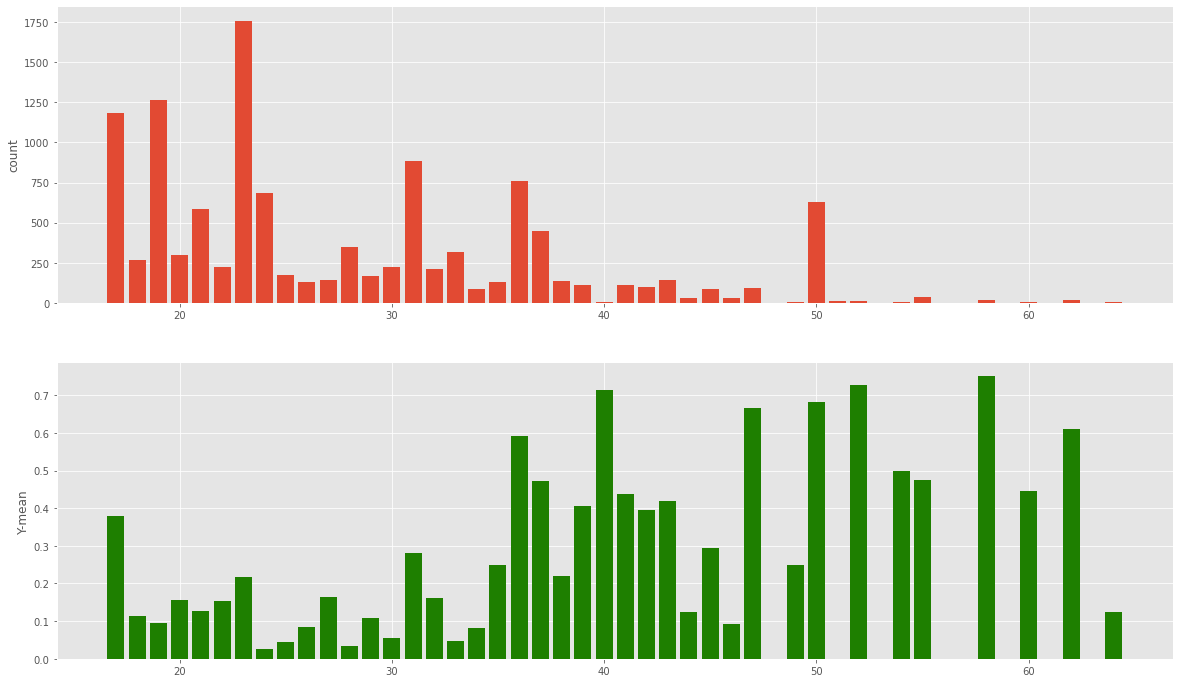

In [8]:
# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(age_pivot.index, age_pivot[("count","Y")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(age_pivot.index, age_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## workclass

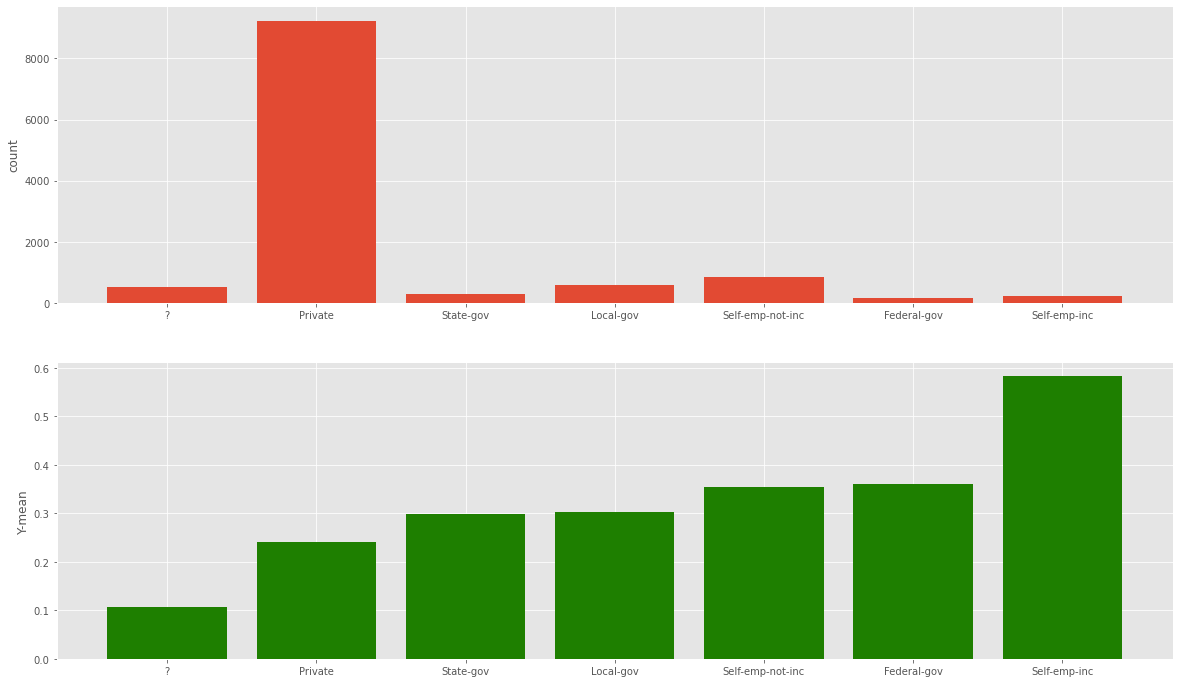

In [9]:
workclass_pivot = all_df.pivot_table(index="workclass", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない)

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(workclass_pivot.index, workclass_pivot[("count","Y")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(workclass_pivot.index, workclass_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## fnlwgt

In [10]:
fnlwgt_pivot = all_df.pivot_table(index="fnlwgt", values="Y", aggfunc=["mean","count"])
fnlwgt_pivot

,mean,count
,Y,Y
fnlwgt,,
24694,0.195266,169
34572,0.380000,50
132652,0.256485,11681


In [11]:
# education
# Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.

In [12]:
all_df = all_df[all_df["education"]!="1st-4th"]

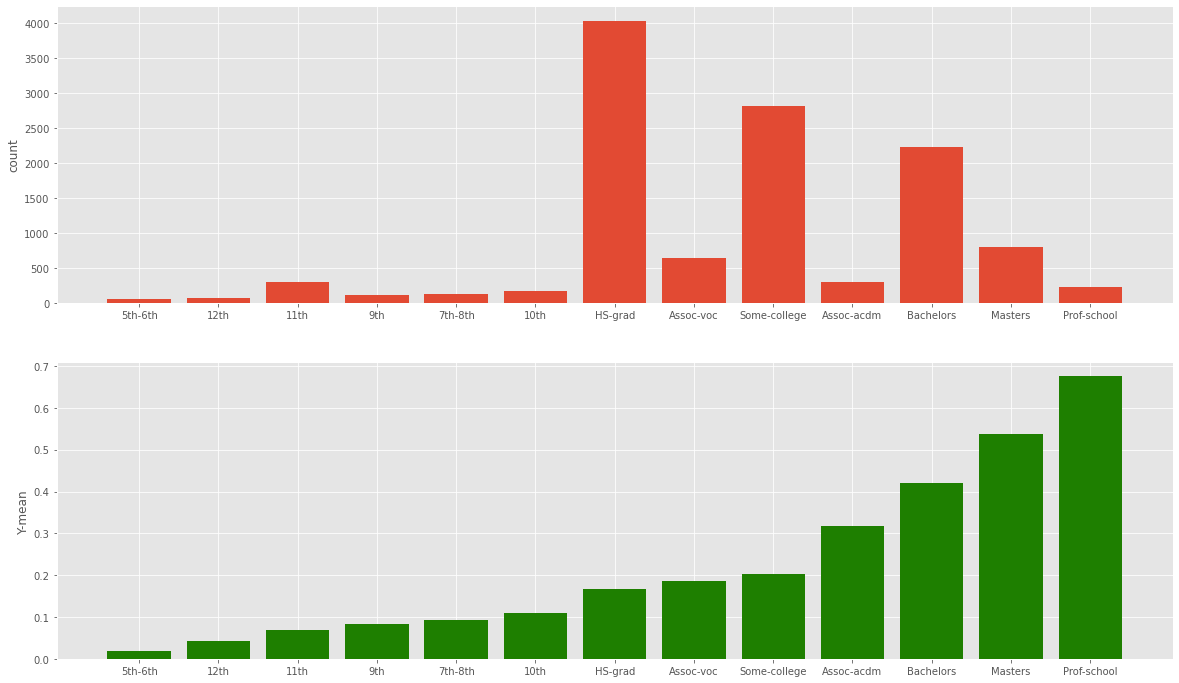

In [13]:
education_pivot = all_df.pivot_table(index="education", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない)

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(education_pivot.index, education_pivot[("count","Y")], ) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(education_pivot.index, education_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## education-num

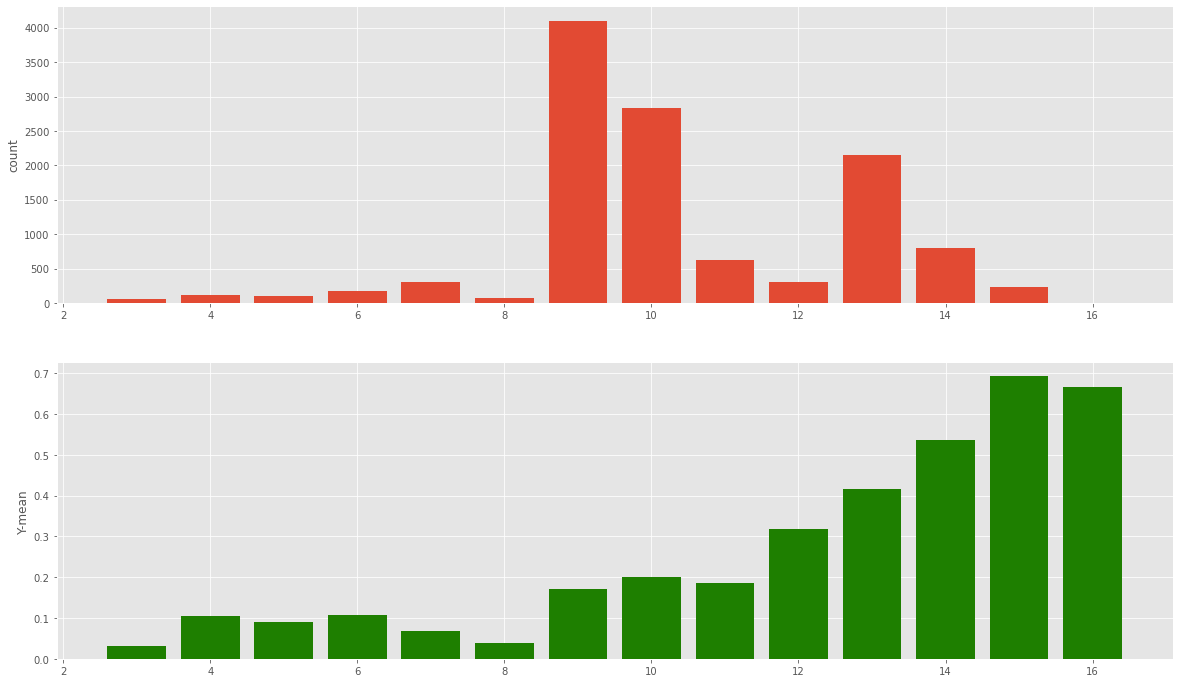

In [14]:
educationnum_pivot = all_df.pivot_table(index="education-num", values="Y", aggfunc=["mean","count"]) 

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(educationnum_pivot.index, educationnum_pivot[("count","Y")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(educationnum_pivot.index, educationnum_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## material-status

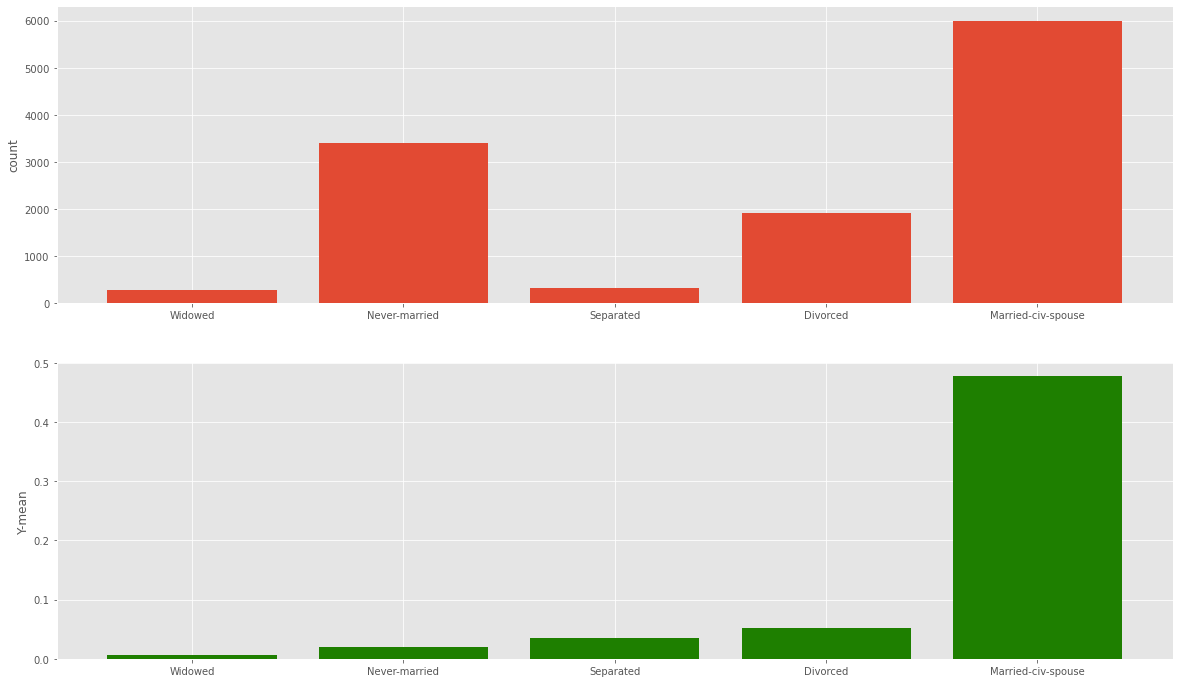

In [15]:
maritalstatus_pivot = all_df.pivot_table(index="marital-status", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(maritalstatus_pivot.index, maritalstatus_pivot[("count","Y")], ) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(maritalstatus_pivot.index, maritalstatus_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## occupation

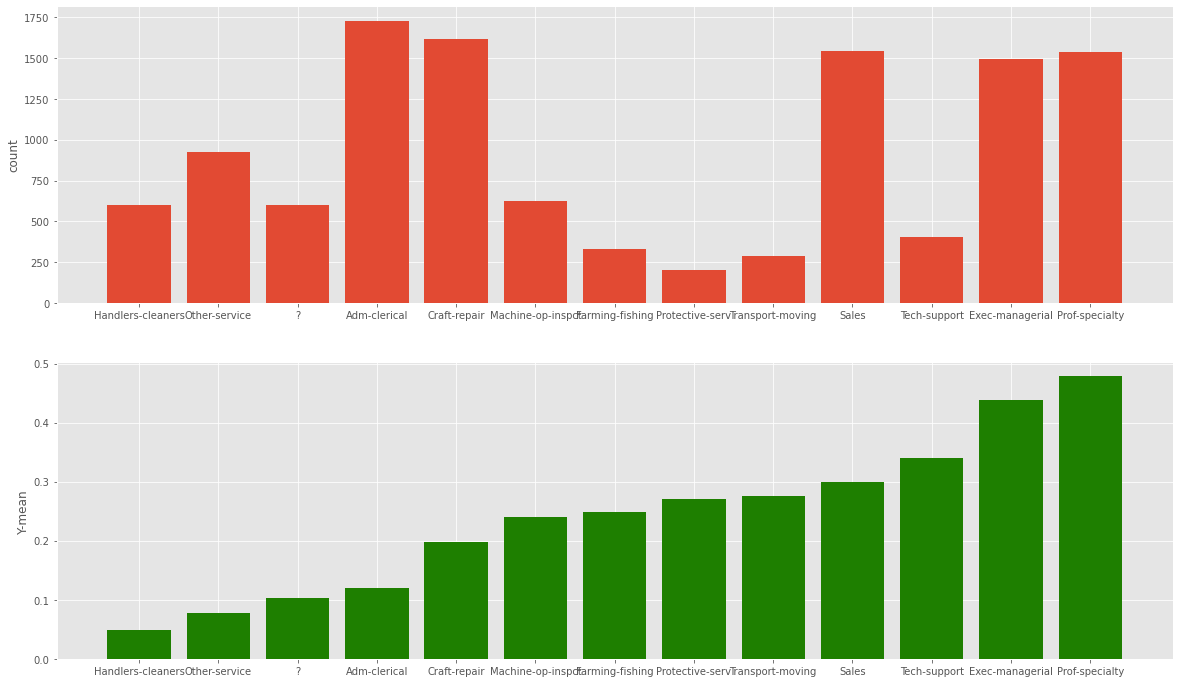

In [16]:
occupation_pivot = all_df.pivot_table(index="occupation", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(occupation_pivot.index, occupation_pivot[("count","Y")], ) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(occupation_pivot.index, occupation_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## relationship

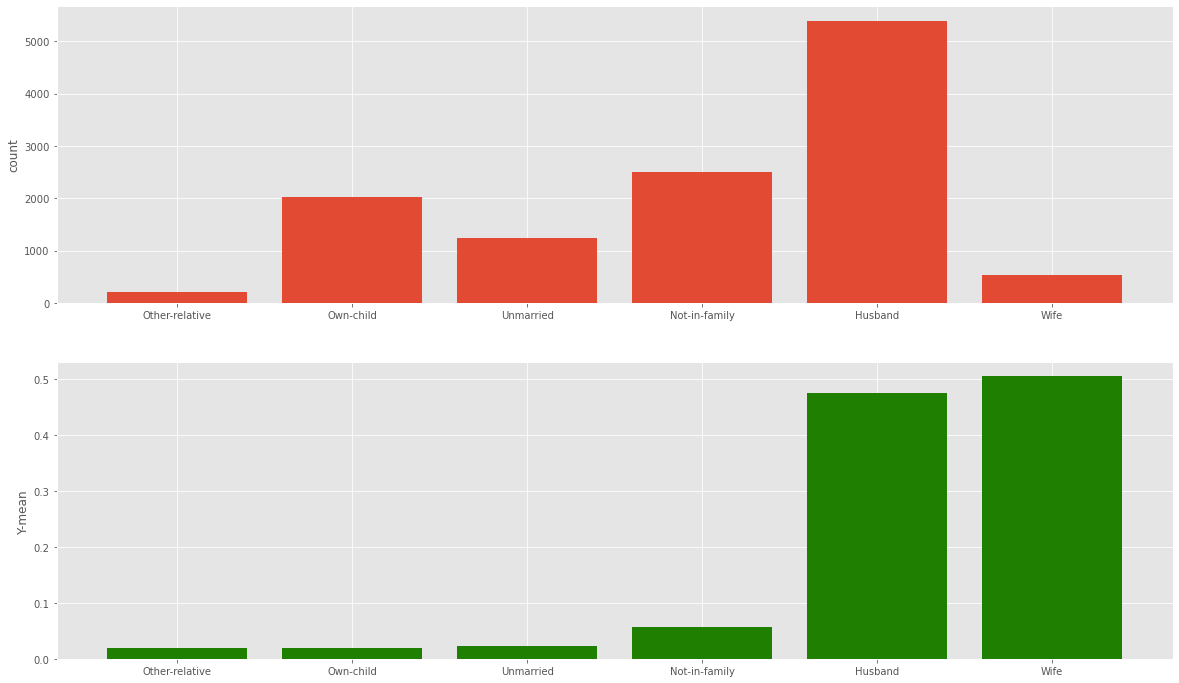

In [17]:
relationship_pivot = all_df.pivot_table(index="relationship", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(relationship_pivot.index, relationship_pivot[("count","Y")], ) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(relationship_pivot.index, relationship_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## race

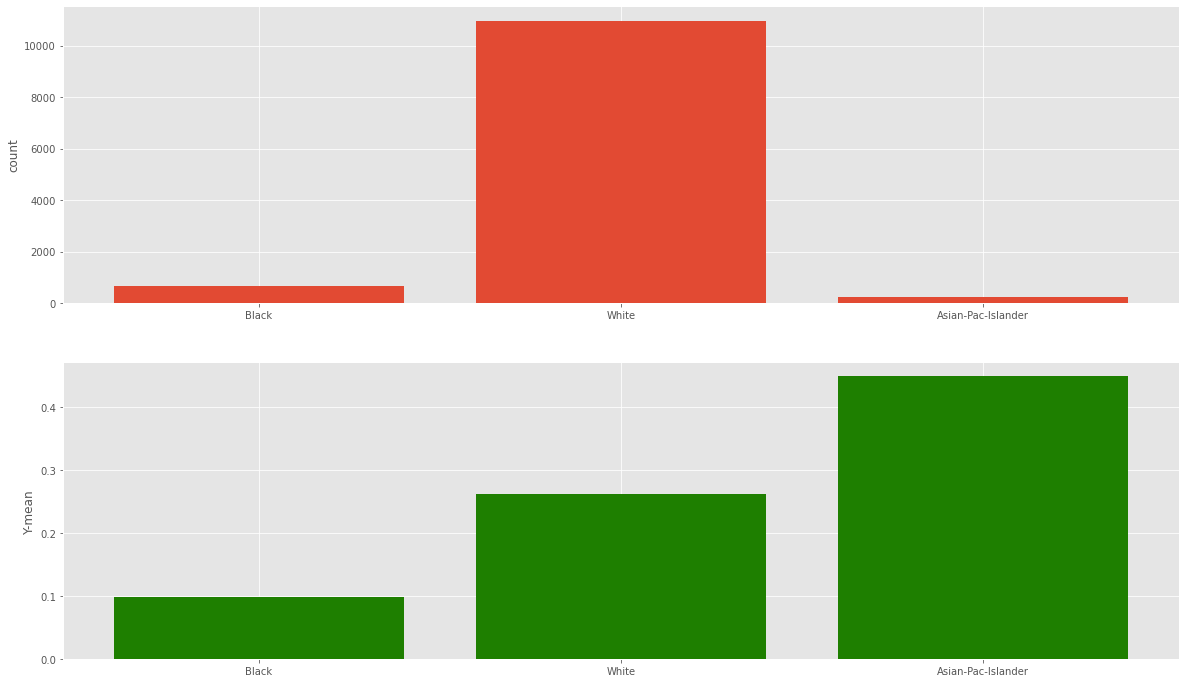

In [18]:
race_pivot = all_df.pivot_table(index="race", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(race_pivot.index, race_pivot[("count","Y")], ) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(race_pivot.index, race_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## sex

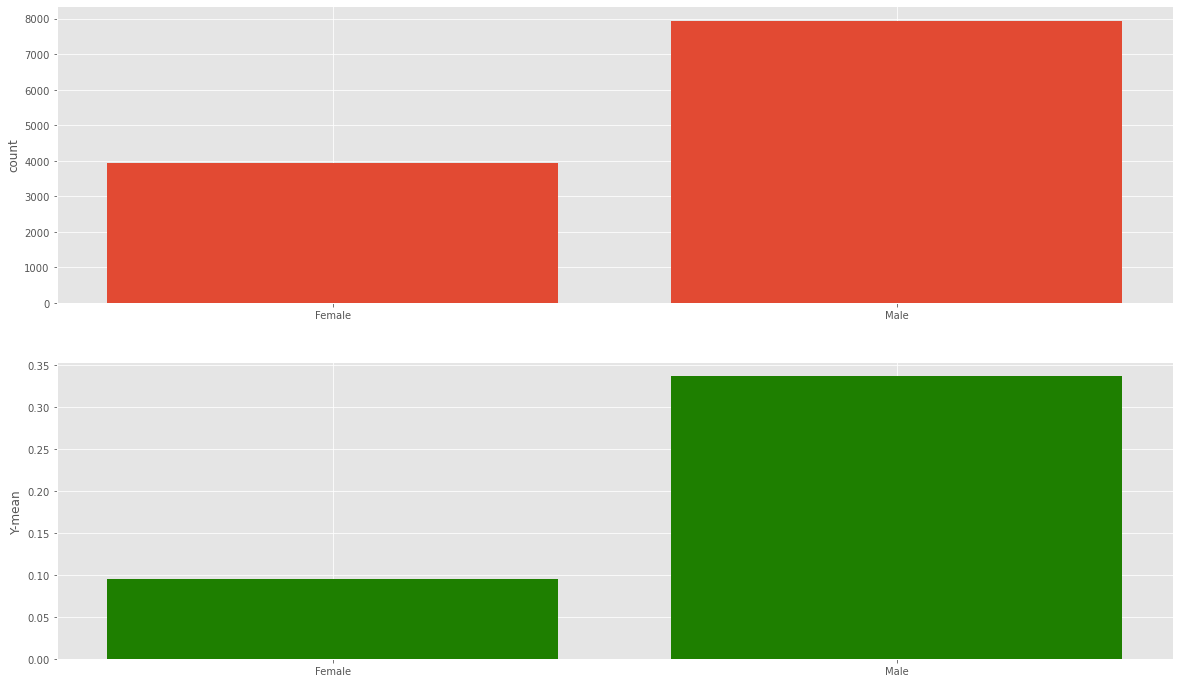

In [19]:
sex_pivot = all_df.pivot_table(index="sex", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(sex_pivot.index, sex_pivot[("count","Y")], ) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(sex_pivot.index, sex_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## native-country

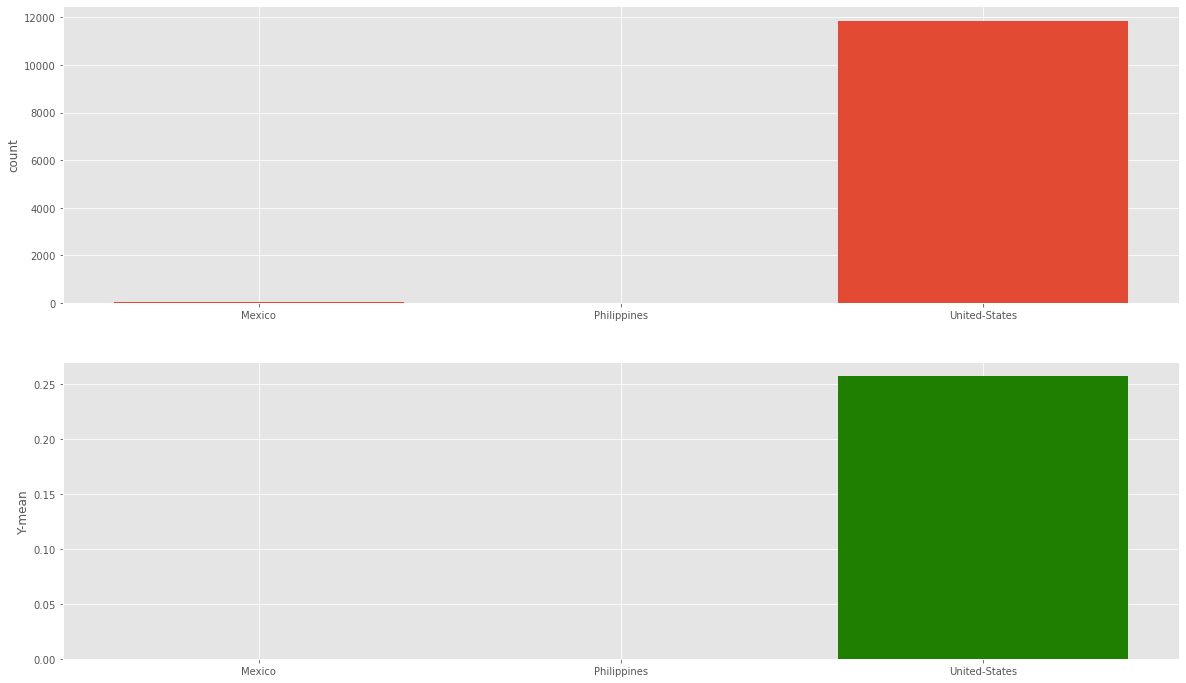

In [20]:
nativecountry_pivot = all_df.pivot_table(index="native-country", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(nativecountry_pivot.index, nativecountry_pivot[("count","Y")], ) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(nativecountry_pivot.index, nativecountry_pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

# 特徴量エンジニアリング

## binning

C:\Users\ishizuka\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


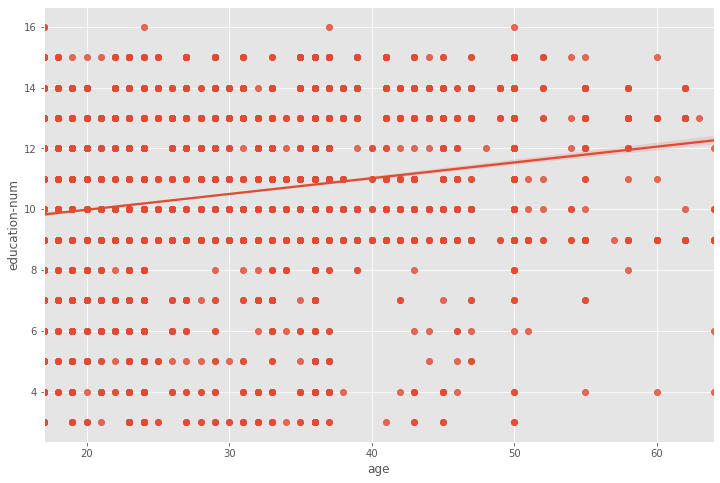

In [21]:
plt.figure(figsize=(12, 8))
sns.regplot(all_df["age"], all_df["education-num"])
plt.show()

In [22]:
# age
bin_edges = [-1, 25, 45, np.inf]
all_df.loc[:, "bin_age"] = pd.cut(all_df["age"], bins=bin_edges, labels=["young", "middle", "senior"]).astype("object")

bin_edges = [-1, 20, 30, 40, 50, 60, np.inf]
all_df.loc[:, "bin_general"] = pd.cut(all_df["age"], bins=bin_edges, labels=["10's", "20's", "30's", "40's", "50's", "60's"]).astype("object")

C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


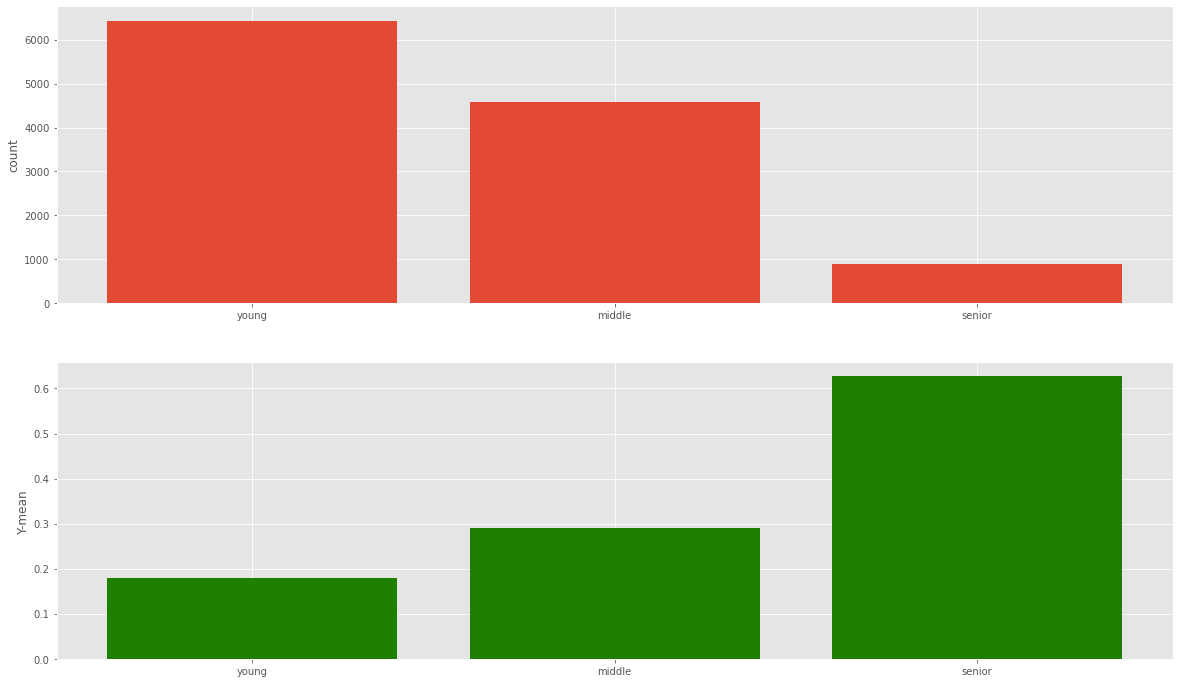

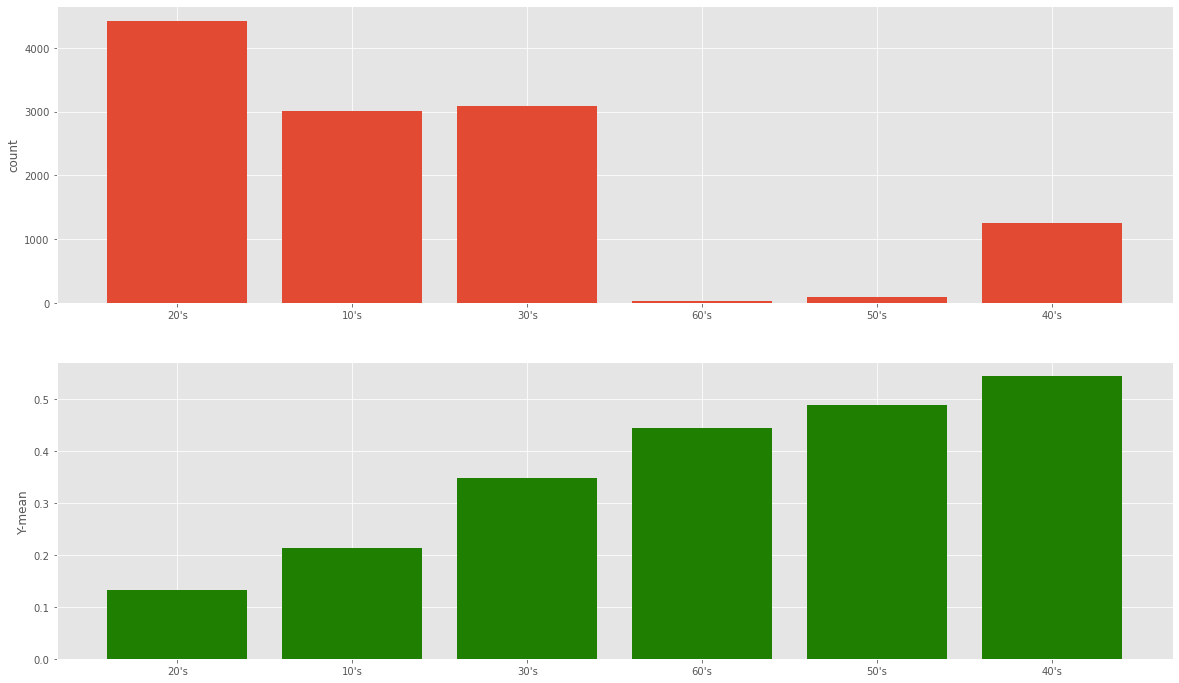

In [23]:
bin_age_pivot = all_df.pivot_table(index="bin_age", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))
bin_general_pivot = all_df.pivot_table(index="bin_general", values="Y", aggfunc=["mean","count"]).sort_values(('mean', 'Y'))

# 横向きはbarh
pivot = bin_age_pivot
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(pivot.index, pivot[("count","Y")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(pivot.index, pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

pivot = bin_general_pivot
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(pivot.index, pivot[("count","Y")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].bar(pivot.index, pivot[("mean","Y")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("Y-mean")
plt.show()

## カテゴリ変数×カテゴリ変数

In [24]:
import itertools

obj_cols = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship', 
    'race', 
    'sex',
#     'native-country',
    'bin_age',
    'bin_general'
]

for cols in itertools.combinations(obj_cols, 2):
    all_df.loc[:, "{}_{}".format(cols[0], cols[1])] = all_df[cols[0]] + "_" + all_df[cols[1]]

C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [25]:
all_df

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y,bin_age,bin_general,workclass_education,workclass_marital-status,workclass_occupation,workclass_relationship,workclass_race,workclass_sex,workclass_bin_age,workclass_bin_general,education_marital-status,education_occupation,education_relationship,education_race,education_sex,education_bin_age,education_bin_general,marital-status_occupation,marital-status_relationship,marital-status_race,marital-status_sex,marital-status_bin_age,marital-status_bin_general,occupation_relationship,occupation_race,occupation_sex,occupation_bin_age,occupation_bin_general,relationship_race,relationship_sex,relationship_bin_age,relationship_bin_general,race_sex,race_bin_age,race_bin_general,sex_bin_age,sex_bin_general,bin_age_bin_general
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States,0.0,young,20's,Private_Some-college,Private_Divorced,Private_Adm-clerical,Private_Own-child,Private_White,Private_Female,Private_young,Private_20's,Some-college_Divorced,Some-college_Adm-clerical,Some-college_Own-child,Some-college_White,Some-college_Female,Some-college_young,Some-college_20's,Divorced_Adm-clerical,Divorced_Own-child,Divorced_White,Divorced_Female,Divorced_young,Divorced_20's,Adm-clerical_Own-child,Adm-clerical_White,Adm-clerical_Female,Adm-clerical_young,Adm-clerical_20's,Own-child_White,Own-child_Female,Own-child_young,Own-child_20's,White_Female,White_young,White_20's,Female_young,Female_20's,young_20's
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0.0,middle,20's,Private_HS-grad,Private_Divorced,Private_Adm-clerical,Private_Not-in-family,Private_White,Private_Female,Private_middle,Private_20's,HS-grad_Divorced,HS-grad_Adm-clerical,HS-grad_Not-in-family,HS-grad_White,HS-grad_Female,HS-grad_middle,HS-grad_20's,Divorced_Adm-clerical,Divorced_Not-in-family,Divorced_White,Divorced_Female,Divorced_middle,Divorced_20's,Adm-clerical_Not-in-family,Adm-clerical_White,Adm-clerical_Female,Adm-clerical_middle,Adm-clerical_20's,Not-in-family_White,Not-in-family_Female,Not-in-family_middle,Not-in-family_20's,White_Female,White_middle,White_20's,Female_middle,Female_20's,middle_20's
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0.0,young,10's,Private_Bachelors,Private_Never-married,Private_Prof-specialty,Private_Not-in-family,Private_White,Private_Female,Private_young,Private_10's,Bachelors_Never-married,Bachelors_Prof-specialty,Bachelors_Not-in-family,Bachelors_White,Bachelors_Female,Bachelors_young,Bachelors_10's,Never-married_Prof-specialty,Never-married_Not-in-family,Never-married_White,Never-married_Female,Never-married_young,Never-married_10's,Prof-specialty_Not-in-family,Prof-specialty_White,Prof-specialty_Female,Prof-specialty_young,Prof-specialty_10's,Not-in-family_White,Not-in-family_Female,Not-in-family_young,Not-in-family_10's,White_Female,White_young,White_10's,Female_young,Female_10's,young_10's
3,3394,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,United-States,0.0,young,10's,Private_HS-grad,Private_Never-married,Private_Craft-repair,Private_Own-child,Private_White,Private_Male,Private_young,Private_10's,HS-grad_Never-married,HS-grad_Craft-repair,HS-grad_Own-child,HS-grad_White,HS-grad_Male,HS-grad_young,HS-grad_10's,Never-married_Craft-repair,Never-married_Own-child,Never-married_White,Never-married_Male,Never-married_young,Never-married_10's,Craft-repair_Own-child,Craft-repair_White,Craft-repair_Male,Craft-repair_young,Craft-repair_10's,Own-child_White,Own-child_Male,Own-child_young,Own-child_10's,White_Male,White_young,White_10's,Male_young,Male_10's,young_10's
4,15993,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0.0,senior,40's,Private_Some-college,Private_Married-civ-spouse,Private_Cra

## 数値変数×数値変数

In [26]:
all_df.loc[:, "prod_age_educationnum"] = all_df["age"] * all_df["education-num"]
all_df.loc[:, "ratio_age_educationnum"] = all_df["age"] / all_df["education-num"]

C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


## カテゴリ変数×数値変数

### 集約特徴量

In [27]:
cate_cols = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
]

group_values = [
    "age",
    "education-num",
]

for col in cate_cols:
    for group in group_values:
        df = all_df.copy()
        all_df.loc[:,"mean_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).mean()[group]) # 平均
        all_df.loc[:,"std_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).std()[group])   # 分散
        all_df.loc[:,"max_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).max()[group])   # 最大値
        all_df.loc[:,"min_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).min()[group])   # 最小値
        all_df.loc[:,"nunique_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).nunique()[group])   # uniaue
        all_df.loc[:,"median_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).median()[group])   # 中央値

### 相対値

In [28]:
cate_cols = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country"
]

group_values = [
    "age",
    "education-num",
]

# カテゴリごとの平均との差
for col in cate_cols:
    for group in group_values:
        df = all_df.copy()
        df.loc[:, "mean_{}_{}".format(col, group)] = df[col].map(all_df.groupby(col).mean()[group]) # 平均
        all_df.loc[:, "{}_diff_{}".format(col, group)] = df[group] - df["mean_{}_{}".format(col, group)]

# Freq encording

In [29]:
cate_cols = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country"
]

for col in cate_cols:
    freq = all_df[col].value_counts()
    # カテゴリの出現回数で置換
    all_df.loc[:, "freq_{}".format(col)] = all_df[col].map(freq)

In [30]:
from sklearn.preprocessing import LabelEncoder

cols = all_df.dtypes[(all_df.dtypes=="object") | (all_df.dtypes=="category")].index
for col in cols:
    le = LabelEncoder()
    all_df.loc[:, col] = le.fit_transform(all_df[col])

C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [31]:
import os
os.environ['HDF5_DISABLE_VERSION_CHECK']='1'

In [32]:
from sklearn.model_selection import train_test_split
train = all_df.iloc[:len(train_df)-1]
X = train.drop(columns=["Y"])
y = train["Y"].values
tr_x, va_x, tr_y, va_y = train_test_split(X, y, random_state=10)

In [33]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ReLU, PReLU
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.preprocessing import StandardScaler


C:\Users\ishizuka\Anaconda3\lib\site-packages\h5py\__init__.py:40: UserWarning: h5py is running against HDF5 1.10.5 when it was built against 1.10.4, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [34]:
# スケーリング
scaler = StandardScaler()
tr_x_s = scaler.fit_transform(tr_x)
va_x_s = scaler.transform(va_x)

# モデル構築
np.random.seed(28)
tf.random.set_seed(73)

def buit_model():
    model = Sequential()
    
    model.add(Dense(96, activation="relu", input_shape=(tr_x_s.shape[1],)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(96, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(96, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(1, activation="sigmoid"))
    
    optimizer = Adam(learning_rate=0.01)
    
    model.compile(optimizer=optimizer,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = buit_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                15456     
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 96)                9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 96)                9

In [35]:
# モデルの学習
# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

model.fit(
    tr_x_s, tr_y,
    batch_size=64,
    epochs=1000,
    verbose=1,
    validation_data=(va_x_s, va_y),
    callbacks=[early_stop]
)

Epoch 1/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.4159 - accuracy: 0.8039 - val_loss: 0.3760 - val_accuracy: 0.8292
Epoch 2/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.3712 - accuracy: 0.8280 - val_loss: 0.3770 - val_accuracy: 0.8403
Epoch 3/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.3625 - accuracy: 0.8314 - val_loss: 0.3508 - val_accuracy: 0.8397
Epoch 4/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.3597 - accuracy: 0.8336 - val_loss: 0.3533 - val_accuracy: 0.8373
Epoch 5/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.3592 - accuracy: 0.8318 - val_loss: 0.3603 - val_accuracy: 0.8350
Epoch 6/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3547 - accuracy: 0.8308 - val_loss: 0.3530 - val_accuracy: 0.8424
Epoch 7/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3552 - accuracy: 0.8311 - val_loss: 0.3632 - val_accuracy:

In [36]:
import shap

In [37]:
explainer = shap.DeepExplainer(model, va_x.iloc[:2, :])

keras is no longer supported, please use tf.keras instead.


In [38]:
shap_values = explainer.shap_values(va_x.iloc[:2, :])

StagingError: in user code:

    C:\Users\ishizuka\Anaconda3\lib\site-packages\shap\explainers\_deep\deep_tf.py:248 grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)
    C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\eager\backprop.py:1048 gradient  **
        unconnected_gradients=unconnected_gradients)
    C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\eager\imperative_grad.py:77 imperative_grad
        compat.as_str(unconnected_gradients.value))
    C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\eager\backprop.py:145 _gradient_function
        grad_fn = ops._gradient_registry.lookup(op_name)  # pylint: disable=protected-access
    C:\Users\ishizuka\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\registry.py:97 lookup
        "%s registry has no entry for: %s" % (self._name, name))

    LookupError: gradient registry has no entry for: shap_AddV2


In [ ]:
shap_values